In [275]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [276]:
path2classic = "/home/lambda/code/synth_spectrum/data/Test_spectrum.syn"
path2low = "/home/lambda/code/synth_spectrum/data/Test_spectrum_bad.syn"
path2med = "/home/lambda/code/synth_spectrum/data/Test_spectrum_med.syn"


In [277]:
def extract_data(path):
    data = np.genfromtxt(path)
    ang = data[:, 0]
    red_flux = data[:, 1]
    cont = data[:, 3]
    ang.astype(float)
    return ang, red_flux, cont

In [278]:
ang, flux, _ = extract_data(path2classic)
ang_low, flux_low, _ = extract_data(path2low)
ang_med, flux_med, _ = extract_data(path2med)

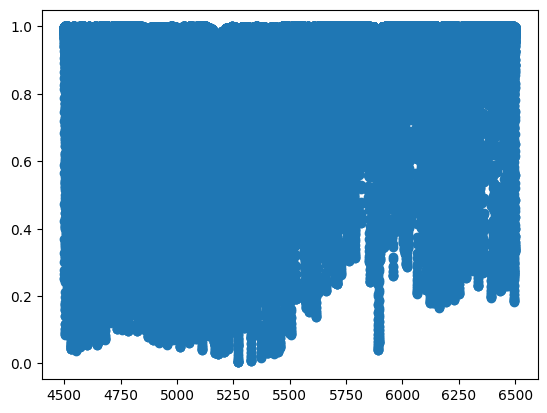

In [279]:
plt.scatter(ang, flux)

In [280]:
# So much data, need to small window
# from 6000 angs to 6100
start = 6000
end = 6010
index_start = np.where(ang==start)[0][0]
index_end = np.where(ang==end)[0][0]
index_start_low = np.where(ang_low==start)[0][0]
index_end_low = np.where(ang_low==end)[0][0]
index_start_med = np.where(ang_med==start)[0][0]
index_end_med = np.where(ang_med==end)[0][0]

In [281]:
ang = ang[index_start:index_end]
ang_low = ang_low[index_start_low:index_end_low]
ang_med = ang_med[index_start_med:index_end_med]

flux = flux[index_start:index_end]
flux_low = flux_low[index_start_low:index_end_low]
flux_med = flux_med[index_start_med:index_end_med]
print(f"From {start} to {end} Ang \n"
      f"spectrum 1 {len(ang)} p \n"
      f"spectrum 2 {len(ang_med)} p \n"
      f"spectrum 3 {len(ang_low)} p")

From 6000 to 6010 Ang 
spectrum 1 1000 p 
spectrum 2 100 p 
spectrum 3 10 p


In [282]:
from scipy.interpolate import CubicSpline
from scipy.interpolate import Akima1DInterpolator
from scipy.interpolate import PchipInterpolator

In [283]:
y_cubicBC_norm = CubicSpline(ang, flux, bc_type="natural")
y_cubicBC_med = CubicSpline(ang_med, flux_med, bc_type="natural")
y_cubicBC_low = CubicSpline(ang_low, flux_low, bc_type="natural")

y_akima_norm = Akima1DInterpolator(ang, flux)
y_akima_med = Akima1DInterpolator(ang_med, flux_med)
y_akima_low = Akima1DInterpolator(ang_low, flux_low)

y_cubicMT_norm = PchipInterpolator(ang, flux)
y_cubicMT_med = PchipInterpolator(ang_med, flux_med)
y_cubicMT_low = PchipInterpolator(ang_low, flux_low)

ang_int_norm = np.linspace(np.min(ang), np.max(ang), len(ang) * 10)
ang_int_med = np.linspace(np.min(ang_med), np.max(ang_med), len(ang_med) * 10)
ang_int_low = np.linspace(np.min(ang_low), np.max(ang_low), len(ang_low) * 10)


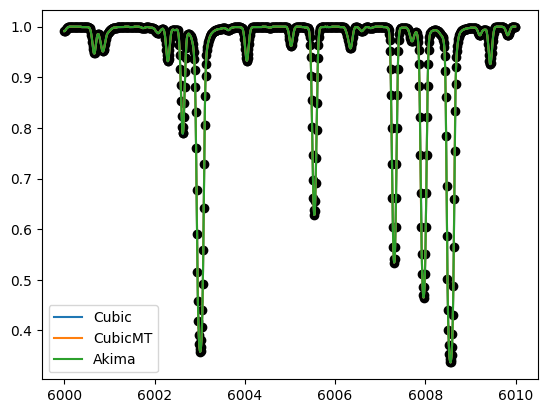

In [284]:
plt.scatter(ang, flux, color="black")
plt.plot(ang_int_norm, y_cubicBC_norm(ang_int_norm), label="Cubic")
plt.plot(ang_int_norm, y_cubicMT_norm(ang_int_norm), label="CubicMT")
plt.plot(ang_int_norm, y_akima_norm(ang_int_norm), label="Akima")
plt.legend()

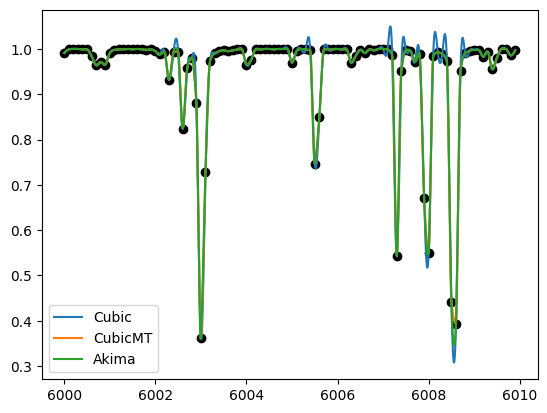

In [285]:
plt.scatter(ang_med, flux_med, color="black")
plt.plot(ang_int_med, y_cubicBC_med(ang_int_med), label="Cubic")
plt.plot(ang_int_med, y_cubicMT_med(ang_int_med), label="CubicMT")
plt.plot(ang_int_med, y_akima_med(ang_int_med), label="Akima")
plt.legend()

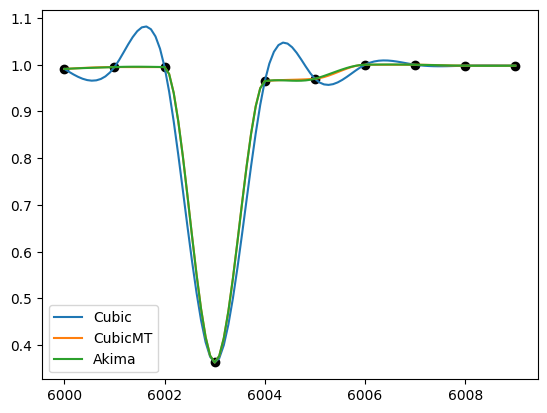

In [286]:
plt.scatter(ang_low, flux_low, color="black")
plt.plot(ang_int_low, y_cubicBC_low(ang_int_low), label="Cubic")
plt.plot(ang_int_low, y_cubicMT_low(ang_int_low), label="CubicMT")
plt.plot(ang_int_low, y_akima_low(ang_int_low), label="Akima")
plt.legend()